In [65]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import _tree
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
target_a = 'TARGET_BAD_FLAG'
target_b = 'IMP_TARGET_LOSS_AMT'

In [16]:
df = pd.read_csv('../data_sets/SA_clean_HMEQ_Loss.csv')

In [17]:
df[df.isna().any(axis=1)]

,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT,IMP_LOAN,flag_LOAN,IMP_MORTDUE,flag_MORTDUE,IMP_VALUE,flag_VALUE,IMP_YOJ,flag_YOJ,...,IMP_DEBTINC,flag_DEBTINC,z_REASON,z_JOB,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp


In [18]:
[*df.columns]

['TARGET_BAD_FLAG',
 'IMP_TARGET_LOSS_AMT',
 'IMP_LOAN',
 'flag_LOAN',
 'IMP_MORTDUE',
 'flag_MORTDUE',
 'IMP_VALUE',
 'flag_VALUE',
 'IMP_YOJ',
 'flag_YOJ',
 'IMP_DEROG',
 'flag_DEROG',
 'IMP_DELINQ',
 'flag_DELINQ',
 'IMP_CLAGE',
 'flag_CLAGE',
 'IMP_NINQ',
 'flag_NINQ',
 'IMP_CLNO',
 'flag_CLNO',
 'IMP_DEBTINC',
 'flag_DEBTINC',
 'z_REASON',
 'z_JOB',
 'z_JOB_Office',
 'z_JOB_Other',
 'z_JOB_ProfExe',
 'z_JOB_Sales',
 'z_JOB_Self',
 'z_REASON_HomeImp']

In [23]:
list(df.columns.difference((target_a, target_b)))

['IMP_CLAGE',
 'IMP_CLNO',
 'IMP_DEBTINC',
 'IMP_DELINQ',
 'IMP_DEROG',
 'IMP_LOAN',
 'IMP_MORTDUE',
 'IMP_NINQ',
 'IMP_VALUE',
 'IMP_YOJ',
 'flag_CLAGE',
 'flag_CLNO',
 'flag_DEBTINC',
 'flag_DELINQ',
 'flag_DEROG',
 'flag_LOAN',
 'flag_MORTDUE',
 'flag_NINQ',
 'flag_VALUE',
 'flag_YOJ',
 'z_JOB_Office',
 'z_JOB_Other',
 'z_JOB_ProfExe',
 'z_JOB_Sales',
 'z_JOB_Self',
 'z_REASON_HomeImp']

In [25]:
x = df[list(df.columns.difference((target_a, target_b)))]
y = df[[target_a, target_b]]

In [20]:
df= df.drop(columns = ['z_JOB', 'z_REASON'])

## Splitting into train and test 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [31]:
display(x_train, x_test, y_train, y_test )

,IMP_CLAGE,IMP_CLNO,IMP_DEBTINC,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
5292,114.666667,12.0,34.818262,6.0,0.0,29000,72478.0,4.0,113000.0,1.5,...,0,0,0,0,0,1,0,0,0,0
1162,121.733333,23.0,34.818262,1.0,0.0,10000,34767.0,0.0,51000.0,23.0,...,0,0,0,0,0,1,0,0,0,1
2355,255.687648,41.0,38.746760,0.0,0.0,14200,100664.0,2.0,129166.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3620,175.500000,16.0,34.818262,0.0,0.0,19000,57429.0,1.0,86250.0,5.0,...,0,1,0,0,1,0,0,0,0,0
1247,100.629664,34.0,37.361514,0.0,0.0,10200,77571.0,0.0,102732.0,6.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,113.257509,28.0,27.347597,2.0,5.0,9000,90969.0,5.0,108606.0,5.0,...,0,0,0,0,0,0,0,0,0,1
5192,146.141930,30.0,39.759850,0.0,1.0,28000,62376.0,0.0,104073.0,16.0,...,0,0,0,0,0,1,0,0,0,0
3980,412.014873,23.0,21.945849,0.0,0.0,20800,65019.0,0.0,78483.0,2.0,...,1,0,0,0,0,0,0,1,0,0
235,136.632944,30.0,32.050023,0.0,0.0,5400,68625.0,0.0,82304.0,2.0,...,0,0,0,0,0,0,0,1,0,0


,IMP_CLAGE,IMP_CLNO,IMP_DEBTINC,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
4146,165.600830,43.0,38.014917,4.0,2.0,21600,154991.0,0.0,89235.5,7.0,...,0,0,1,1,0,0,0,0,1,0
4103,314.984287,17.0,43.103002,0.0,0.0,21400,143151.0,0.0,185014.0,7.0,...,0,0,0,0,0,0,0,0,0,1
5439,116.729746,5.0,37.999082,0.0,0.0,32200,16232.0,1.0,60238.0,0.0,...,0,0,0,0,0,1,0,0,0,0
997,350.639006,46.0,30.061371,0.0,0.0,9400,76989.0,0.0,88788.0,24.0,...,0,0,0,0,0,1,0,0,0,1
5908,116.906104,11.0,43.368718,1.0,0.0,65100,67389.0,0.0,142740.0,9.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,165.310282,37.0,20.342811,0.0,0.0,21700,128841.0,0.0,172954.0,4.0,...,0,0,0,0,0,0,1,0,0,0
100,63.933333,15.0,34.818262,2.0,1.0,4100,58500.0,2.0,65000.0,8.0,...,0,0,0,0,0,1,0,0,0,1
5164,95.043074,13.0,20.209038,0.0,1.0,27700,65019.0,1.0,42515.0,11.0,...,1,1,0,0,0,1,0,0,0,0
5208,302.803261,23.0,36.390474,0.0,0.0,28200,76011.0,0.0,129352.0,1.0,...,0,0,0,0,1,0,0,0,0,0


,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
5292,1,31053.0
1162,0,0.0
2355,0,0.0
3620,0,0.0
1247,0,0.0
...,...,...
905,1,8501.0
5192,0,0.0
3980,0,0.0
235,0,0.0


,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
4146,1,23515.0
4103,0,0.0
5439,0,0.0
997,0,0.0
5908,0,0.0
...,...,...
4171,0,0.0
100,1,4003.0
5164,0,0.0
5208,0,0.0


## Decision Tree

In [34]:
#classification model for predicting default 

In [40]:
#1- building the decision tree
fm01_tree = tree.DecisionTreeClassifier(max_depth=5)
fm01_tree = fm01_tree.fit(x_train, y_train[target_a])

In [41]:
#predicting on train and test
fm01_tree_pred_train = fm01_tree.predict(x_train)
fm01_tree_pred_test= fm01_tree.predict(x_test)

In [60]:
#checking accuracy predictions
print('Train Accuracy:', metrics.accuracy_score(y_train[target_a],fm01_tree_pred_train),'\n',
'Test Accuracy:',  metrics.accuracy_score(y_test[target_a],fm01_tree_pred_test))

Train Accuracy: 0.8974412751677853 
 Test Accuracy: 0.8884228187919463


In [63]:
text_representation = tree.export_text(fm01_tree, feature_names=list(x_train.columns))
print(text_representation)

|--- flag_DEBTINC <= 0.50
|   |--- IMP_DEBTINC <= 44.67
|   |   |--- IMP_DELINQ <= 4.50
|   |   |   |--- flag_VALUE <= 0.50
|   |   |   |   |--- IMP_DEROG <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- IMP_DEROG >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- flag_VALUE >  0.50
|   |   |   |   |--- flag_YOJ <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- flag_YOJ >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- IMP_DELINQ >  4.50
|   |   |   |--- IMP_CLAGE <= 297.54
|   |   |   |   |--- class: 1
|   |   |   |--- IMP_CLAGE >  297.54
|   |   |   |   |--- class: 0
|   |--- IMP_DEBTINC >  44.67
|   |   |--- IMP_CLAGE <= 299.90
|   |   |   |--- IMP_CLAGE <= 234.72
|   |   |   |   |--- class: 1
|   |   |   |--- IMP_CLAGE >  234.72
|   |   |   |   |--- IMP_DEBTINC <= 46.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- IMP_DEBTINC >  46.35
|   |   |   |   |   |--- class: 1
|   |   |--- IMP_CLAGE >  299.90
|   |   |   |--- IMP_LOAN <= 203

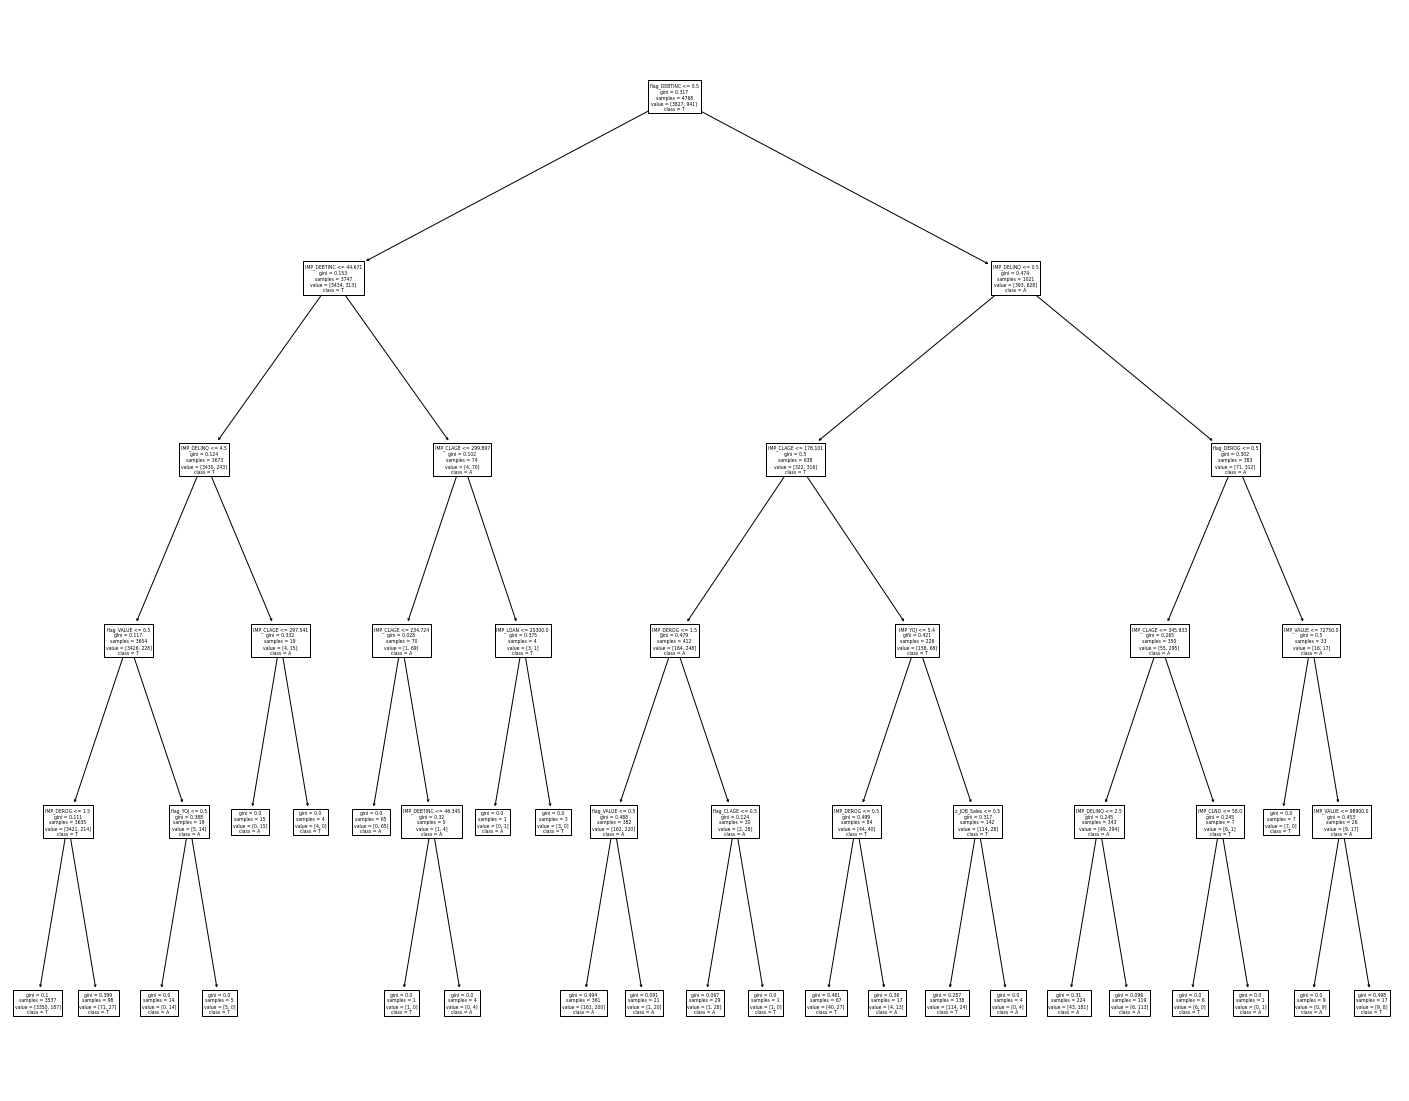

In [67]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(fm01_tree, 
                   feature_names=list(x_train.columns),  
                   class_names=target_a,
                   filled=False)

In [70]:
df['flag_DEBTINC']

0       1
1       1
2       1
3       1
4       1
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: flag_DEBTINC, Length: 5960, dtype: int64